<a href="https://colab.research.google.com/github/BlackCurrantDS/Data-Mining/blob/master/Cleavland_fold1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [588]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

In [589]:
import warnings
warnings.filterwarnings("ignore")

In [590]:
#loading the cleaveland data

df  = pd.read_csv('clv.csv', header = None)

In [591]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [592]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'class']

In [593]:
df['class'] = df['class'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [594]:
#getting 3 folds since data set is small

"""from sklearn.model_selection import KFold

#df = in_file.values
kf = KFold(n_splits=3, shuffle=True, random_state=1)

for i, (train, test) in enumerate(kf.split(df)):

  train_d = df.iloc[train]
  test_d =  df.iloc[test]
  train_d.to_csv('/content/drive/MyDrive/BreastCancer_Dataset/K-fold/train'+str(i)+'.csv', index=False)
  test_d.to_csv('/content/drive/MyDrive/BreastCancer_Dataset/K-fold/test'+str(i)+'.csv', index=False)"""

"from sklearn.model_selection import KFold\n\n#df = in_file.values\nkf = KFold(n_splits=3, shuffle=True, random_state=1)\n\nfor i, (train, test) in enumerate(kf.split(df)):\n\n  train_d = df.iloc[train]\n  test_d =  df.iloc[test]\n  train_d.to_csv('/content/drive/MyDrive/BreastCancer_Dataset/K-fold/train'+str(i)+'.csv', index=False)\n  test_d.to_csv('/content/drive/MyDrive/BreastCancer_Dataset/K-fold/test'+str(i)+'.csv', index=False)"

In [595]:
train= pd.read_csv("/content/drive/MyDrive/BreastCancer_Dataset/K-fold/train0.csv")

In [596]:
train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
4,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0


In [597]:
train['thal'] = train.thal.fillna(train.thal.mean())
train['ca'] = train.ca.fillna(train.ca.mean())

In [598]:
X = np.matrix(train.iloc[:, [0, 1, 2, 3,4,5,6,7,8,9,10,11,12]])
y = np.array(train['class'])

In [599]:
test= pd.read_csv("/content/drive/MyDrive/BreastCancer_Dataset/K-fold/test0.csv")


In [600]:
test['thal'] = test.thal.fillna(test.thal.mean())
test['ca'] = test.ca.fillna(test.ca.mean())

In [601]:
X_test = np.matrix(test.iloc[:, [0, 1, 2, 3,4,5,6,7,8,9,10,11,12]])
y_test = np.array(test['class'])

In [602]:
#
# Create training and test split
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
#
# Create categorical labels
#
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

val_labels = to_categorical(y_val)

In [603]:
# define the overfitting model

overfitting_network = models.Sequential() #512
overfitting_network.add(layers.Dense(512, activation='relu', input_shape=(13,)))
overfitting_network.add(layers.Dense(2, activation='softmax'))

# define the underfitting model

underfitting_network = models.Sequential() #512
underfitting_network.add(layers.Dense(512, activation='relu', input_shape=(13,)))
underfitting_network.add(layers.Dense(2, activation='softmax'))

In [604]:
# Compile the network
#
overfitting_network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

underfitting_network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [605]:
# Fit the overfitting neural network
#
history = overfitting_network.fit(X_train, train_labels, epochs=400, batch_size=40,validation_data=(X_val, val_labels))

Epoch 1/400
5/5 [==============================] - 1s 50ms/step - loss: 10.8685 - accuracy: 0.5342 - val_loss: 23.3786 - val_accuracy: 0.4634
Epoch 2/400
5/5 [==============================] - 0s 7ms/step - loss: 9.6340 - accuracy: 0.5404 - val_loss: 4.2293 - val_accuracy: 0.5366
Epoch 3/400
5/5 [==============================] - 0s 8ms/step - loss: 4.8127 - accuracy: 0.4907 - val_loss: 6.3594 - val_accuracy: 0.5366
Epoch 4/400
5/5 [==============================] - 0s 8ms/step - loss: 4.0111 - accuracy: 0.5093 - val_loss: 7.1384 - val_accuracy: 0.5366
Epoch 5/400
5/5 [==============================] - 0s 8ms/step - loss: 4.3468 - accuracy: 0.4969 - val_loss: 7.4609 - val_accuracy: 0.4634
Epoch 6/400
5/5 [==============================] - 0s 9ms/step - loss: 3.8007 - accuracy: 0.5404 - val_loss: 3.3014 - val_accuracy: 0.5366
Epoch 7/400
5/5 [==============================] - 0s 8ms/step - loss: 3.1014 - accuracy: 0.5280 - val_loss: 9.8902 - val_accuracy: 0.5366
Epoch 8/400
5/5 [=======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


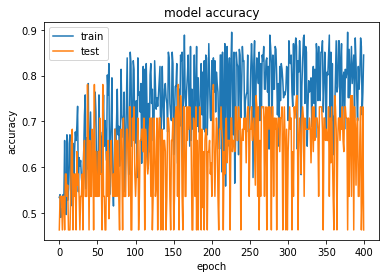

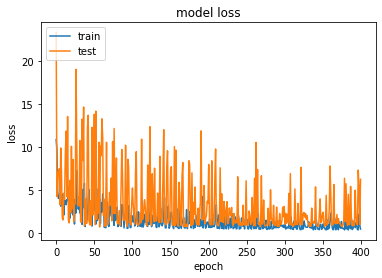

In [606]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [607]:
#
# Get the accuracy of test data set
#
test_loss, test_acc = overfitting_network.evaluate(X_test, test_labels)
#
# Print the test accura0cy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

4/4 [==============================] - 0s 3ms/step - loss: 6.2149 - accuracy: 0.4950
Test Accuracy:  0.49504950642585754 
Test Loss:  6.214873313903809


In [608]:
y_hats_overfitting = overfitting_network.predict(test.iloc[:, [0, 1, 2, 3,4,5,6,7,8,9,10,11,12]])
classes_x_overfitting=np.argmax(y_hats_overfitting,axis=1)

In [609]:
#train underfitting
history = underfitting_network.fit(X_train, train_labels, epochs=15, batch_size=40,validation_data=(X_val, val_labels))

Epoch 1/15
5/5 [==============================] - 1s 45ms/step - loss: 9.8686 - accuracy: 0.4720 - val_loss: 15.8481 - val_accuracy: 0.5366
Epoch 2/15
5/5 [==============================] - 0s 8ms/step - loss: 5.7896 - accuracy: 0.5714 - val_loss: 8.1679 - val_accuracy: 0.4634
Epoch 3/15
5/5 [==============================] - 0s 9ms/step - loss: 5.6882 - accuracy: 0.5155 - val_loss: 2.5641 - val_accuracy: 0.4634
Epoch 4/15
5/5 [==============================] - 0s 7ms/step - loss: 3.3638 - accuracy: 0.5714 - val_loss: 1.8644 - val_accuracy: 0.5610
Epoch 5/15
5/5 [==============================] - 0s 7ms/step - loss: 3.2114 - accuracy: 0.5776 - val_loss: 13.7626 - val_accuracy: 0.5366
Epoch 6/15
5/5 [==============================] - 0s 8ms/step - loss: 5.2170 - accuracy: 0.5963 - val_loss: 10.5545 - val_accuracy: 0.5366
Epoch 7/15
5/5 [==============================] - 0s 8ms/step - loss: 3.6173 - accuracy: 0.6708 - val_loss: 4.4947 - val_accuracy: 0.5610
Epoch 8/15
5/5 [==============

In [610]:
y_hats_underfitting = underfitting_network.predict(test.iloc[:, [0, 1, 2, 3,4,5,6,7,8,9,10,11,12]])
classes_x_underfitting=np.argmax(y_hats_underfitting,axis=1)

In [611]:
underfitting_predictions = pd.DataFrame(classes_x_underfitting, columns=['underfitting_predictions'])
test = pd.concat([test, underfitting_predictions], axis =1)

In [612]:
#
# Get the accuracy of test data set
#
test_loss, test_acc = underfitting_network.evaluate(X_test, test_labels)
#
# Print the test accura0cy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

4/4 [==============================] - 0s 4ms/step - loss: 12.2773 - accuracy: 0.5446
Test Accuracy:  0.5445544719696045 
Test Loss:  12.2772798538208


In [613]:
overfitting_predictions = pd.DataFrame(classes_x_overfitting, columns=['overfitting_predictions'])
test = pd.concat([test, overfitting_predictions], axis =1)


In [614]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,underfitting_predictions,overfitting_predictions
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0,0,1
1,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0,0,1
2,56,1,2,120,236,0,0,178,0,0.8,1,0.000000,3.0,0,0,1
3,56,0,2,140,294,0,2,153,0,1.3,2,0.000000,3.0,0,0,1
4,56,1,3,130,256,1,2,142,1,0.6,2,1.000000,6.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,59,1,4,164,176,1,2,90,0,1.0,2,2.000000,6.0,1,0,1
97,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1,0,1
98,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1,0,1
99,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1,0,1


Binning the continous columns

In [615]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,54.589109,0.633663,3.207921,131.504950,249.767327,0.138614,0.985149,149.331683,0.316832,1.070297,1.603960,0.611940,4.675000,0.460396
std,9.088535,0.483000,0.949646,18.058018,54.725914,0.346402,0.999889,22.697971,0.466397,1.112663,0.599821,0.908039,1.934082,0.499667
min,34.000000,0.000000,1.000000,94.000000,149.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,3.000000,120.000000,211.250000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.500000,0.000000,0.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.250000,0.000000,2.000000,165.000000,1.000000,1.800000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,194.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


In [616]:
bins = np.arange(0,train['age'].max() + 10, 10)
labels = [str(x) for x in bins[1:]]
train['binned_age'] = pd.cut(train['age'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,train['cp'].max() + 1, 1)
labels = [str(x) for x in bins[1:]]
train['binned_cp'] = pd.cut(train['cp'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,train['trestbps'].max() + 1, 20)
labels = [str(x) for x in bins[1:]]
train['binned_trestbps'] = pd.cut(train['trestbps'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,train['chol'].max() + 50,50)
labels = [str(x) for x in bins[1:]]
train['binned_chol'] = pd.cut(train['chol'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,train['fbs'].max() + 1,.3)
labels = [str(x) for x in bins[1:]]
train['binned_fbs'] = pd.cut(train['fbs'], bins=bins,labels=labels,include_lowest=True) 

bins = np.arange(0,train['restecg'].max() + 1,.3)
labels = [str(x) for x in bins[1:]]
train['binned_restecg'] = pd.cut(train['restecg'], bins=bins,labels=labels,include_lowest=True) 

bins = np.arange(0,train['thalach'].max() + 5,5)
labels = [str(x) for x in bins[1:]]
train['binned_thalach'] = pd.cut(train['thalach'], bins=bins,labels=labels,include_lowest=True) 

bins = np.arange(0,train['exang'].max() + 1,.5)
labels = [str(x) for x in bins[1:]]
train['binned_exang'] = pd.cut(train['exang'], bins=bins,labels=labels,include_lowest=True) 

bins = np.arange(0,train['oldpeak'].max() + 1,1)
labels = [str(x) for x in bins[1:]]
train['binned_oldpeak'] = pd.cut(train['oldpeak'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,train['slope'].max() + 1,.5)
labels = [str(x) for x in bins[1:]]
train['binned_slope'] = pd.cut(train['slope'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,train['ca'].max() + 1,1)
labels = [str(x) for x in bins[1:]]
train['binned_ca'] = pd.cut(train['ca'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,train['thal'].max() + 2,1)
labels = [str(x) for x in bins[1:]]
train['binned_thal'] = pd.cut(train['thal'], bins=bins,labels=labels,include_lowest=True)

In [617]:
"""for i in train.columns:

    bin = 'binned_'+i
    bins = np.arange(0,train[i].max() + 1, .25)
    labels = [str(x) for x in bins[1:]]
    train[bin] = pd.cut(train[i], bins=bins,labels=labels,include_lowest=True)"""


"for i in train.columns:\n\n    bin = 'binned_'+i\n    bins = np.arange(0,train[i].max() + 1, .25)\n    labels = [str(x) for x in bins[1:]]\n    train[bin] = pd.cut(train[i], bins=bins,labels=labels,include_lowest=True)"

In [618]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,binned_age,binned_cp,binned_trestbps,binned_chol,binned_fbs,binned_restecg,binned_thalach,binned_exang,binned_oldpeak,binned_slope,binned_ca,binned_thal
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,70,4,160,300,0.3,2.1,110,1.0,2.0,2.0,3.0,3.0
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,70,4,120,250,0.3,2.1,130,1.0,3.0,2.0,2.0,7.0
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,40,3,140,250,0.3,0.3,190,0.5,4.0,3.0,1.0,3.0
3,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1,70,4,140,300,0.3,2.1,160,0.5,4.0,3.0,2.0,3.0
4,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,60,4,120,400,0.3,0.3,165,1.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,44,1,4,120,169,0,0,144,1,2.8,3,0.0,6.0,1,50,4,120,200,0.3,0.3,145,1.0,3.0,3.0,1.0,6.0
198,63,1,4,140,187,0,2,144,1,4.0,1,2.0,7.0,1,70,4,140,200,0.3,2.1,145,1.0,4.0,1.0,2.0,7.0
199,63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0,1,70,4,140,200,0.3,0.3,140,1.0,1.0,2.0,1.0,3.0
200,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1,60,4,140,250,0.3,0.3,125,1.0,1.0,2.0,1.0,7.0


In [619]:
train[train['binned_age'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,binned_age,binned_cp,binned_trestbps,binned_chol,binned_fbs,binned_restecg,binned_thalach,binned_exang,binned_oldpeak,binned_slope,binned_ca,binned_thal


In [620]:
bins = np.arange(0,train['age'].max() + 10, 10)
bins

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

In [621]:
train['chol'].max()+1

565

In [622]:
labels = [str(x) for x in bins[1:]]
labels

['10', '20', '30', '40', '50', '60', '70', '80']

In [623]:
"""bins_0 = [ 0,  35,  70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420,
       455, 490, 525, 560]
labels_0 = [  35,  70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420,
       455, 490, 525, 560]
train['binned_chol'] = pd.cut(train['chol'], bins_0,labels=labels_0)"""

"bins_0 = [ 0,  35,  70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420,\n       455, 490, 525, 560]\nlabels_0 = [  35,  70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420,\n       455, 490, 525, 560]\ntrain['binned_chol'] = pd.cut(train['chol'], bins_0,labels=labels_0)"

In [624]:
#passing to different df to generate rare rules
df_pr = train[[ 'binned_age', 'sex', 'binned_cp', 'binned_trestbps', 'binned_chol', 'binned_fbs', 'binned_restecg', 'binned_thalach', 'binned_exang', 'binned_oldpeak', 'binned_slope'
, 'binned_ca', 'binned_thal', 'class']]

In [625]:
for i in df_pr.columns:
  if i != 0:
   df_pr[i] = df_pr[i].astype(str).str.replace('.', '')


In [626]:
df_pr['class'] = df_pr['class'].astype(str)+'10'
df_pr['sex'] = df_pr['sex'].astype(str)+'20'
x = 30
for i in df_pr.columns:
  if "binned" in i:
    df_pr[i] = df_pr[i].astype(str)+str(x)
    x= x+10

In [627]:
df_pr.head(5)

,binned_age,sex,binned_cp,binned_trestbps,binned_chol,binned_fbs,binned_restecg,binned_thalach,binned_exang,binned_oldpeak,binned_slope,binned_ca,binned_thal,class
0,7030,120,440,16050,30060,0370,2180,11090,10100,20110,20120,30130,30140,110
1,7030,120,440,12050,25060,0370,2180,13090,10100,30110,20120,20130,70140,110
2,4030,120,340,14050,25060,0370,0380,19090,05100,40110,30120,10130,30140,010
3,7030,020,440,14050,30060,0370,2180,16090,05100,40110,30120,20130,30140,110
4,6030,020,440,12050,40060,0370,0380,16590,10100,10110,10120,10130,30140,010


In [628]:
#put it in csv file
df_pr[['class', 'binned_age', 'sex', 'binned_cp', 'binned_trestbps', 'binned_chol', 'binned_fbs', 'binned_restecg', 'binned_thalach', 'binned_exang', 'binned_oldpeak', 'binned_slope'
, 'binned_ca', 'binned_thal']].to_csv("iris_for_rare_rules.csv", index=False,sep =' ', header=None)

In [629]:
#for test dataframe

In [630]:
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,underfitting_predictions,overfitting_predictions
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0,1
1,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0,1
2,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,0,1
3,56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0,0,1
4,56,1,3,130,256,1,2,142,1,0.6,2,1.0,6.0,1,0,1


In [631]:
"""for i in test.columns:

  if i not in ['class',	'overfitting_predictions'	,'underfitting_predictions']:
    #print(i)
    bin = 'binned_'+i
    bins = np.arange(0,test[i].max() + 1, .25)
    labels = [str(x) for x in bins[1:]]
    test[bin] = pd.cut(test[i], bins=bins,labels=labels,include_lowest=True)"""

"for i in test.columns:\n\n  if i not in ['class',\t'overfitting_predictions'\t,'underfitting_predictions']:\n    #print(i)\n    bin = 'binned_'+i\n    bins = np.arange(0,test[i].max() + 1, .25)\n    labels = [str(x) for x in bins[1:]]\n    test[bin] = pd.cut(test[i], bins=bins,labels=labels,include_lowest=True)"

In [632]:
bins = np.arange(0,test['age'].max() + 10, 10)
labels = [str(x) for x in bins[1:]]
test['binned_age'] = pd.cut(test['age'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,test['cp'].max() + 1, 1)
labels = [str(x) for x in bins[1:]]
test['binned_cp'] = pd.cut(test['cp'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,test['trestbps'].max() + 1, 20)
labels = [str(x) for x in bins[1:]]
test['binned_trestbps'] = pd.cut(test['trestbps'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,test['chol'].max() + 50,50)
labels = [str(x) for x in bins[1:]]
test['binned_chol'] = pd.cut(test['chol'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,test['fbs'].max() + 1,.3)
labels = [str(x) for x in bins[1:]]
test['binned_fbs'] = pd.cut(test['fbs'], bins=bins,labels=labels,include_lowest=True) 

bins = np.arange(0,test['restecg'].max() + 1,.3)
labels = [str(x) for x in bins[1:]]
test['binned_restecg'] = pd.cut(test['restecg'], bins=bins,labels=labels,include_lowest=True) 

bins = np.arange(0,test['thalach'].max() + 5,5)
labels = [str(x) for x in bins[1:]]
test['binned_thalach'] = pd.cut(test['thalach'], bins=bins,labels=labels,include_lowest=True) 

bins = np.arange(0,test['exang'].max() + 1,.5)
labels = [str(x) for x in bins[1:]]
test['binned_exang'] = pd.cut(test['exang'], bins=bins,labels=labels,include_lowest=True) 

bins = np.arange(0,test['oldpeak'].max() + 1,1)
labels = [str(x) for x in bins[1:]]
test['binned_oldpeak'] = pd.cut(test['oldpeak'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,test['slope'].max() + 1,.5)
labels = [str(x) for x in bins[1:]]
test['binned_slope'] = pd.cut(test['slope'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,test['ca'].max() + 1,1)
labels = [str(x) for x in bins[1:]]
test['binned_ca'] = pd.cut(test['ca'], bins=bins,labels=labels,include_lowest=True)

bins = np.arange(0,test['thal'].max() + 2,1)
labels = [str(x) for x in bins[1:]]
test['binned_thal'] = pd.cut(test['thal'], bins=bins,labels=labels,include_lowest=True)

In [633]:
for i in test.columns:
  if i not in ['class',	'overfitting_predictions'	,'underfitting_predictions']:
    test[i] = test[i].astype(str).str.replace('.', '')

In [634]:
test['sex'] = test['sex'].astype(str)+'20'
x = 30
for i in test.columns:
  if "binned" in i:
    test[i] = test[i].astype(str)+str(x)
    x= x+10
    

In [635]:
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,underfitting_predictions,overfitting_predictions,binned_age,binned_cp,binned_trestbps,binned_chol,binned_fbs,binned_restecg,binned_thalach,binned_exang,binned_oldpeak,binned_slope,binned_ca,binned_thal
0,63,120,1,145,233,1,2,150,0,23,3,00,60,0,0,1,7030,140,16050,25060,1270,2180,15090,05100,30110,30120,10130,60140
1,41,020,2,130,204,0,2,172,0,14,1,00,30,0,0,1,5030,240,14050,25060,0370,2180,17590,05100,20110,10120,10130,30140
2,56,120,2,120,236,0,0,178,0,08,1,00,30,0,0,1,6030,240,12050,25060,0370,0380,18090,05100,10110,10120,10130,30140
3,56,020,2,140,294,0,2,153,0,13,2,00,30,0,0,1,6030,240,14050,30060,0370,2180,15590,05100,20110,20120,10130,30140
4,56,120,3,130,256,1,2,142,1,06,2,10,60,1,0,1,6030,340,14050,30060,1270,2180,14590,10100,10110,20120,10130,60140


call RP-growth on it

In [636]:
pip install spmf

In [637]:
from spmf import Spmf
import pathlib

In [638]:
d = '/content/'

In [639]:
spmf = Spmf("RPGrowth_itemsets", input_filename="iris_for_rare_rules.csv",
            output_filename="output_iris_rpgrowth_rareitemsets.txt", arguments=[0.8, .01],spmf_bin_location_dir=d )

In [640]:
spmf.run()

>/content/spmf.jar
=============  RP-GROWTH 2.38 - STATS =============
 Transactions count from database : 202
 Max memory usage: 43.93250274658203 mb 
 Rare itemsets count : 153378
 Total time ~ 776 ms



In [641]:
class_numbers = df_pr['class'].unique()
class_numbers

array(['110', '010'], dtype=object)

In [642]:
#processing rpp file

In [643]:
#removing sup
f = open('/content/output_iris_rpgrowth_rareitemsets.txt','r')
lst = []
for line in f:
  line  = line.split("#", 1)
  
  line  = line[0]
  lst.append(line)
f.close()
f = open('/content/output_processed.txt','w')
for line in lst:
    f.write(line+'\n')
f.close()

In [644]:
rp_growth_process = pd.read_csv("/content/output_processed.txt", header=None, names=["itemsets"],index_col=False)

In [645]:
temp_df = pd.concat([rp_growth_process[['itemsets']], rp_growth_process['itemsets'].str.split(' ', expand=True)], axis=1
                  )

In [646]:
temp_df=temp_df.drop('itemsets', axis=1)

In [647]:
temp_df.to_csv("temp_file.csv")

In [648]:
with open("/content/temp_file.csv", 'w') as f:
                for row in temp_df.itertuples(index=False):
                    #print(row)
                    ls = list(row)
                    ls = [x for x in ls if x]
                    try:
                      if '010' or '110' in ls:
                            old_index = ls.index('010') if '010' in ls else ls.index('110') 
                            #print("old_index", old_index)
                            
                            ls.insert(0, ls.pop(old_index))
                            #print("after row", ls)
                            f.write(str(ls)+'\n')
                    except ValueError:
                      pass

In [649]:
import os
from ast import literal_eval

def parse_input(filename):
    with open(filename) as f:
        data = [set(literal_eval(line)) for line in f]
    return data

def compute_output(output_file, data, filter_value):
    ls = data
    index_to_pop=[]
    for set1 in ls:
      #print("set1", set1)
      for set2 in ls:
          if set1 is set2:
              # Do not try to compare a row with itself
              continue
          elif len(set(set1).difference(set(set2))) == 0:
                if set1 in ls:
                  index = ls.index(set1)
                  index_to_pop.append(index)

                  break
    #print("Final index_to_pop",index_to_pop)              
    for index in sorted(index_to_pop, reverse=True):
        del ls[index]           
    #print("Final list",ls)

    f = open('/content/superset.csv','w')
    for line in ls:
      #print("length of line is", len(line))
      if len(line) >= filter_value:
        #print("filtered line is",line)
        f.write(str(line)+'\n')
      else:
        pass
    f.close()

def filter_file(path, filter_value=5, in_name='temp_file.csv', out_name='filteredSets'):
    data = parse_input(os.path.join(path, in_name))
    #print("data", data)
    output_filename = os.path.join(path, '{}{}'.format(out_name, filter_value))
    with open(output_filename, 'w') as out_file:
        compute_output(out_file, data, filter_value)

filter_file('/content')

In [650]:
with open('/content/superset.csv') as filein, open('/content/superset_final.csv','w') as fileout:
    for line in filein:
        line=line.replace("'","")
        line=line.replace("}","")
        line=line.replace("{","")
        line=line.replace(", "," ")
        fileout.write(line)

In [651]:
with open('/content/superset_final.csv') as filein, open('/content/superset_final_v1.csv','w') as fileout:
    for line in filein:
        line=line.replace("[","")
        line=line.replace("]","")
        fileout.write(line)

In [652]:
temp_df = pd.read_csv("/content/superset_final_v1.csv",header=None, names=["itemsets"],index_col=False)

In [653]:
temp_df = pd.concat([temp_df[['itemsets']], temp_df['itemsets'].str.split(' ', expand=True)], axis=1
                  )

In [654]:
temp_df=temp_df.drop('itemsets', axis=1)

In [655]:
temp_df.to_csv("temp_file.csv")

In [656]:
with open("/content/superset.csv", 'w') as f:
                for row in temp_df.itertuples(index=False):
                    #print(row)
                    ls = list(row)
                    ls = [x for x in ls if x]
                    try:
                      if '010' or '110' in ls:
                            old_index = ls.index('010') if '010' in ls else ls.index('110')
                            #print("old_index", old_index)
                            
                            ls.insert(0, ls.pop(old_index))
                            #print("after row", ls)
                            f.write(str(ls)+'\n')
                    except ValueError:
                      pass

In [657]:
with open('/content/superset.csv') as filein, open('/content/superset_final.csv','w') as fileout:
    for line in filein:
        line=line.replace("'","")
        line=line.replace("}","")
        line=line.replace("{","")
        line=line.replace(", "," ")
        fileout.write(line)

In [658]:
with open('/content/superset_final.csv') as filein, open('/content/superset_final_v1.csv','w') as fileout:
    for line in filein:
        line=line.replace("[","")
        line=line.replace("]","")
        fileout.write(line)

In [659]:
superset = pd.read_csv("/content/superset_final_v1.csv",header=None, names=["itemsets"],index_col=False)

In [660]:
superset_df = pd.concat([superset[['itemsets']], superset['itemsets'].str.split(' ', expand=True)], axis=1
                  )

In [661]:
superset_df = superset_df.loc[superset_df.iloc[:,1].isin(['010','110'])] #filtering rows

In [662]:
superset_df=superset_df.drop('itemsets', axis=1)

In [663]:
superset_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,110,20120,370,11090,2180,440,120,None,None,None,None,None
1,110,20120,370,12090,440,10100,120,None,None,None,None,None
2,110,20110,10130,10590,120,70140,None,None,None,None,None,None
3,110,6030,10130,440,10590,120,None,None,None,None,None,None
4,110,20120,370,10130,10590,120,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1120,110,20120,370,30140,2180,10130,120,None,None,None,None,None
1121,110,20120,5100,30140,10130,120,2180,None,None,None,None,None
1122,110,20120,5100,370,30140,2180,120,None,None,None,None,None
1123,110,20120,10110,370,380,30140,10130,440,None,None,None,None


In [664]:
superset_df.columns = ['a', 'b', 'c', 'd', 'e','f', 'g', 'h', 'i','j', 'k', 'l']

In [665]:
#concat @ to tempdf
for i,n in enumerate(superset_df.columns):
  
    superset_df[n] = '@' + superset_df[n].astype(str)

In [666]:
superset_df['a'].value_counts()

@110    1125
Name: a, dtype: int64

In [667]:
superset_df['rules'] = superset_df['b']+','+superset_df['c']+','+superset_df['d']+','+superset_df['e']+','+superset_df['f']+','+superset_df['g']+','+superset_df['h']+','+superset_df['i']+','+superset_df['j']+','+superset_df['k']+','+superset_df['l']

In [668]:
superset_df['pos'] = superset_df['rules'].str.find('@None')

In [669]:
superset_df['rules'] = superset_df.apply(lambda x: x['rules'][0:x['pos']],axis=1)
superset_df['rules'] = superset_df['rules']+">"+superset_df['a']
superset_df['rules'] = superset_df['rules'].str.replace(',>','>')

In [670]:
superset_df['rules'] = superset_df['rules'].str.replace('@','')

In [671]:
superset_df['rules']

0              20120,370,11090,2180,440,120>110
1             20120,370,12090,440,10100,120>110
2               20110,10130,10590,120,70140>110
3                  6030,10130,440,10590,120>110
4                 20120,370,10130,10590,120>110
                         ...                   
1120         20120,370,30140,2180,10130,120>110
1121        20120,5100,30140,10130,120,2180>110
1122          20120,5100,370,30140,2180,120>110
1123    20120,10110,370,380,30140,10130,440>110
1124                20120,10110,380,440,120>110
Name: rules, Length: 1125, dtype: object

In [672]:
superset_df['rules'].to_csv("iris_rare_rules.csv", header=None, index=False)

In [673]:
superset_df.to_csv("superset.csv")

In [674]:
#refining predictions

In [675]:
superset_df['b'] = superset_df['b'].str.replace('@','')
superset_df['c'] = superset_df['c'].str.replace('@','')
superset_df['d'] = superset_df['d'].str.replace('@','')
superset_df['e'] = superset_df['e'].str.replace('@','')
superset_df['f'] = superset_df['f'].str.replace('@','')
superset_df['g'] = superset_df['g'].str.replace('@','')
superset_df['h'] = superset_df['h'].str.replace('@','')
superset_df['i'] = superset_df['i'].str.replace('@','')
superset_df['j'] = superset_df['j'].str.replace('@','')
superset_df['k'] = superset_df['k'].str.replace('@','')
superset_df['l'] = superset_df['l'].str.replace('@','')

In [676]:
for row in superset_df[['a','b','c','d', 'e','f','g','h','i', 'j', 'k', 'l']].itertuples(index=False):
          ls1 = list(row)
          ls1 = [x for x in ls1 if x]
          class_value = ls1[0]
          #print("class_value",class_value)
          ls1.pop(0)
          
          set1 =ls1
          #print("superset row",set1)
          #print("set1", set1)
          for index, row in enumerate(test[['binned_age', 'sex', 'binned_cp', 'binned_trestbps', 'binned_chol', 'binned_fbs', 'binned_restecg', 'binned_thalach', 'binned_exang', 'binned_oldpeak', 'binned_slope'
, 'binned_ca', 'binned_thal']].itertuples(index=False)):
                    ls = list(row)
                    ls = [x for x in ls if x]
                    set2 =ls
                    #print("set2", set2)
                    if set1 is set2:
                        # Do not try to compare a row with itself
                      
                        continue
                    elif len(set(set1).difference(set(set2))) == 0:
                      #print("set1", set1)
                      #print("set2", set2)
                      #print("assigned class value",class_value)
                      test.at[index, 'rules_class']=class_value
                      #test['rules_class'] = class_value
                      #print("rule",df_pr['rules_class'])
                    else:
                      print("not matching rule")
                      test.at[index, 'rules_class']=np.nan

Streaming output truncated to the last 5000 lines.
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching rule
not matching 

In [677]:
test.to_csv("test_df.csv")

In [678]:
test['rules_class'].value_counts()

Series([], Name: rules_class, dtype: int64)

In [679]:
test['rules_class'] = test['rules_class'].str.replace('@','')

AttributeError: ignored

In [680]:
test['rules_class'].value_counts(dropna=False)

NaN    101
Name: rules_class, dtype: int64

In [681]:
test['rules_class'] = test['rules_class'].fillna(test['underfitting_predictions'])

In [682]:
test['rules_class_final'] = test['rules_class'].astype(str).str[0]

In [683]:
test['rules_class_final'].value_counts()

0    101
Name: rules_class_final, dtype: int64

In [684]:
#change for the violet class
test['rules_class_final_class'] = test['underfitting_predictions'].apply(lambda x: x if x == 0 else np.nan )

In [685]:
test['rules_class_final_class'] = test['rules_class_final_class'].fillna(test['rules_class'])

In [686]:
test['rules_class_final'] = test['rules_class_final_class'].astype(str).str[0]

In [687]:
t_array = test['rules_class_final'].astype(int).to_numpy() 

In [688]:
t_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [689]:
from sklearn.metrics import confusion_matrix,classification_report

In [690]:
target_names = ['class 0', 'class 1']

In [691]:
original = test['class'].astype(str).str[0].astype(int).to_numpy() 

In [692]:
underfitting = test['underfitting_predictions'].astype(int).to_numpy()
overfitting = test['overfitting_predictions'].astype(int).to_numpy()  

In [693]:
#rules predcition confusion matrix
confusion_matrix(original, t_array)

array([[55,  0],
       [46,  0]])

In [694]:
print(classification_report(original, t_array, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.54      1.00      0.71        55
     class 1       0.00      0.00      0.00        46

    accuracy                           0.54       101
   macro avg       0.27      0.50      0.35       101
weighted avg       0.30      0.54      0.38       101



In [695]:
#overftting
confusion_matrix(original, overfitting)

array([[ 4, 51],
       [ 0, 46]])

In [696]:
print(classification_report(original, overfitting, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.07      0.14        55
     class 1       0.47      1.00      0.64        46

    accuracy                           0.50       101
   macro avg       0.74      0.54      0.39       101
weighted avg       0.76      0.50      0.37       101



In [697]:
#underfitting
confusion_matrix(original, underfitting)

array([[55,  0],
       [46,  0]])

In [698]:
print(classification_report(original, underfitting, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.54      1.00      0.71        55
     class 1       0.00      0.00      0.00        46

    accuracy                           0.54       101
   macro avg       0.27      0.50      0.35       101
weighted avg       0.30      0.54      0.38       101



In [ ]:
#plotting reults

In [701]:
org_class=test['class'].astype(str).str[0]

<Figure size 432x288 with 0 Axes>

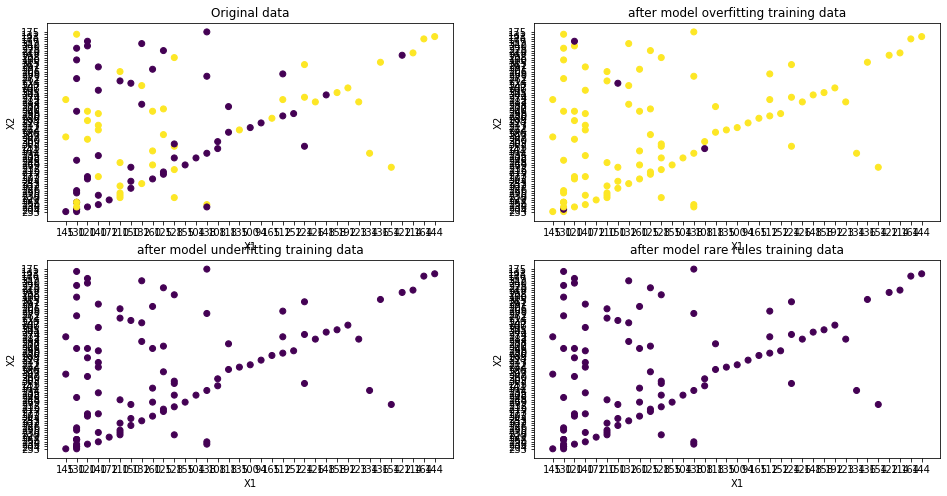

In [704]:
fig = plt.figure()
plt.figure(figsize=(16, 8))


plt.subplot(2, 2, 1)

plt.scatter(test['trestbps'], test['chol'],c=org_class.astype(int).to_numpy() )
plt.title('Original data')
plt.xlabel('X1')
plt.ylabel('X2')


plt.subplot(2, 2, 2)

plt.scatter(test['trestbps'], test['chol'], c=classes_x_overfitting)
plt.title('after model overfitting training data')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 3)

plt.scatter(test['trestbps'], test['chol'], c=classes_x_underfitting)
plt.title('after model underfitting training data')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2, 2, 4)

plt.scatter(test['trestbps'], test['chol'], c=t_array)
plt.title('after model rare rules training data')
plt.xlabel('X1')
plt.ylabel('X2')

plt.savefig("Heart_data_plot.png")